In [10]:
from sympy import symbols, lambdify
import numpy as np
import scipy.integrate
y, (kf, kb) = symbols('y:3'), symbols('kf kb')
rf = kf * y[0]**2 * y[1]
rb = kb * y[2]**2
ydot = [2*(rb - rf), rb - rf, 2*(rf - rb)] # derivative of the function y(t); value given by function rhs (right-hand side) for input values y, kf, and kb
ydot
# [2*kb*y2**2 - 2*kf*y0**2*y1, kb*y2**2 - kf*y0**2*y1, -2*kb*y2**2 + 2*kf*y0**2*y1]

[2*kb*y2**2 - 2*kf*y0**2*y1,
 kb*y2**2 - kf*y0**2*y1,
 -2*kb*y2**2 + 2*kf*y0**2*y1]

In [11]:
t = symbols('t') # not used in this case
f = lambdify((t, y, kf, kb), ydot) # convert the SymPy symbolic expression for ydot into a form that SciPy can evaluate numerically, f
k_vals = np.array([0.42, 0.17]) # arbitrary in this case
y0 = [1, 1, 0] # initial condition (initial values)
t_eval = np.linspace(0, 10, 50) # evaluate integral from t = 0-10 for 50 points
solution = scipy.integrate.solve_ivp(f, (0, 10), y0, t_eval=t_eval, args=k_vals) # call SciPy's solve_ivp by passing it the function f, the interval of integration, the initial state, and the arguments to pass to the function f
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
 t_events: None
        y: array([[1.        , 0.8588458 , 0.76037109, 0.68865638, 0.63448858,
      

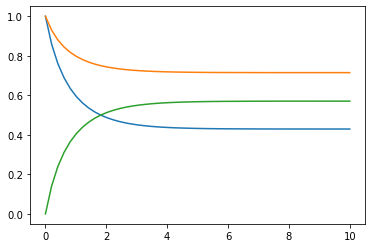

In [12]:
import matplotlib.pyplot as plt
y = solution.y # Extract the y (concentration) values from SciPy solution result
plt.plot(t_eval, y.T) # Plot concentrations against time. doctest: +SKIP
# plt.xlabel('t') # Label the x axis as t. doctest: +SKIP
# plt.ylabel('Concentration') # Label the y axis as concentration. doctest: +SKIP
# plt.legend(['NO', 'Br$_2$', 'NOBr'], shadow=True) # Add a legend with the chemical formulas. doctest: +SKIP
# plt.title('Chemical Kinetics') # Title the plot. doctest: +SKIP
# plt.show() # Display the plot